I need you to open a file in python using pandas. I also need you to drop the null values from the dataframe. Please write the code for me.

In [1]:
import pandas as pd

# Read CSV file
df = pd.read_csv('card_transdata.csv')
df_cleaned = df.dropna()

Create a countplot of the column labeled "fraud" from the df_cleanded using seaborn.

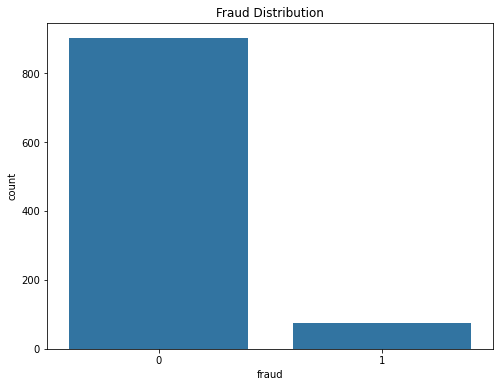

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=df_cleaned)
plt.title('Fraud Distribution')
plt.show()

I also need you to make countplots of the "used_pin_number", "repeat_retailer", and "used_chip" columns. I need a histogram with 25 bins of the  "distance_from_last_transaction" column from the same dataframe. Each should be on their own plot.

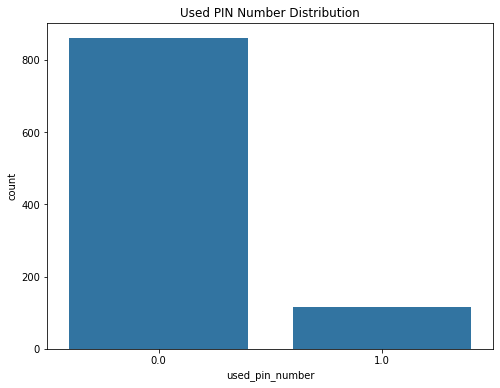

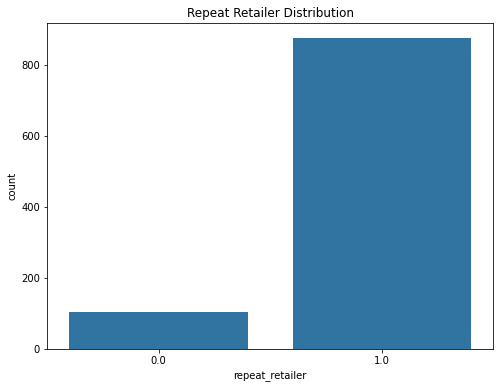

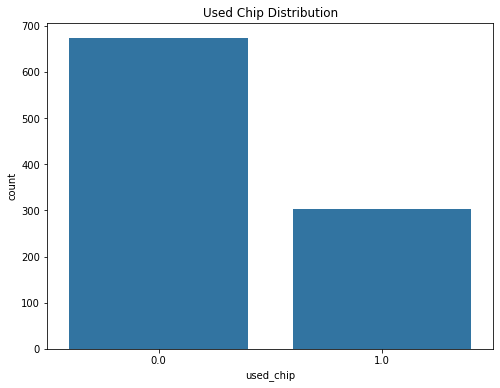

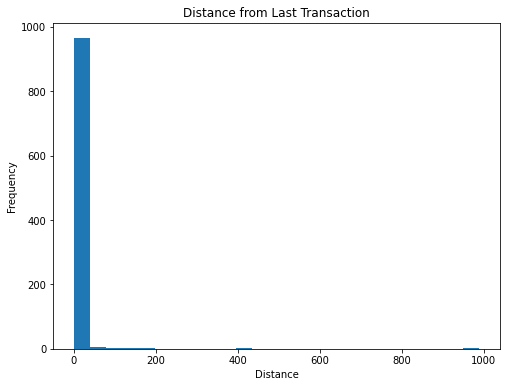

In [3]:
# Used PIN Number plot
plt.figure(figsize=(8, 6))
sns.countplot(x='used_pin_number', data=df_cleaned)
plt.title('Used PIN Number Distribution')
plt.show()

# Repeat Retailer plot
plt.figure(figsize=(8, 6))
sns.countplot(x='repeat_retailer', data=df_cleaned)
plt.title('Repeat Retailer Distribution')
plt.show()

# Used Chip plot
plt.figure(figsize=(8, 6))
sns.countplot(x='used_chip', data=df_cleaned)
plt.title('Used Chip Distribution')
plt.show()

# Distance from Last Transaction histogram
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['distance_from_last_transaction'], bins=25)
plt.title('Distance from Last Transaction')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

Also create a histogram for "distance_from_home" and "ratio_to_median_purchase_price", each having their own figure.

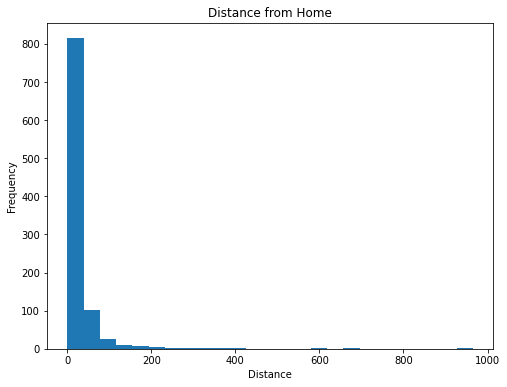

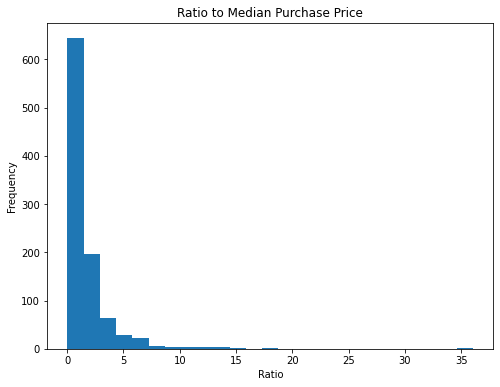

In [4]:
# Distance from Home histogram
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['distance_from_home'], bins=25)
plt.title('Distance from Home')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# Ratio to Median Purchase Price histogram
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['ratio_to_median_purchase_price'], bins=25)
plt.title('Ratio to Median Purchase Price')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

I need a countplot of "online_order".

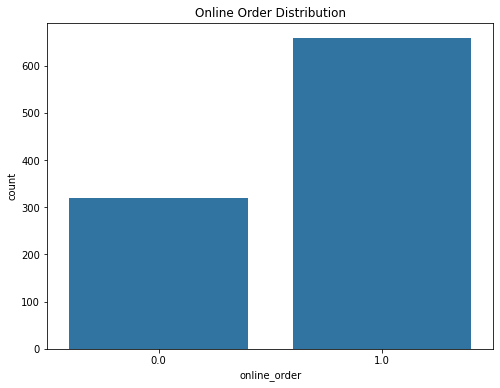

In [5]:
# Online Order countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=df_cleaned)
plt.title('Online Order Distribution')
plt.show()

I also need you to create a scatterplot to see the distribution of the column "fraud". The data is in binary format and should be displayed as different colors on the graph.

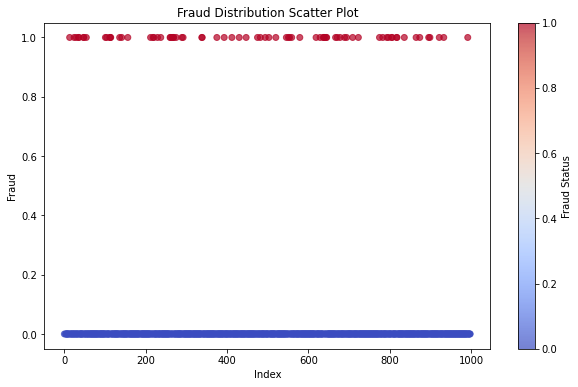

In [6]:
# Create a scatter plot of fraud distribution
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned.index, df_cleaned['fraud'], c=df_cleaned['fraud'], cmap='coolwarm', alpha=0.7)
plt.title('Fraud Distribution Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Fraud')
plt.colorbar(label='Fraud Status')
plt.show()

Use the dist_from_home on the x-axis and then the ratio_to_median_purchase_price column on the y_axis using a scatterplot. The color of each point should be set according to the "fraud" column, which contains binary values.

The color of the data points where fraud equals 0 should be green.

Where it is fraud, the color should be red.

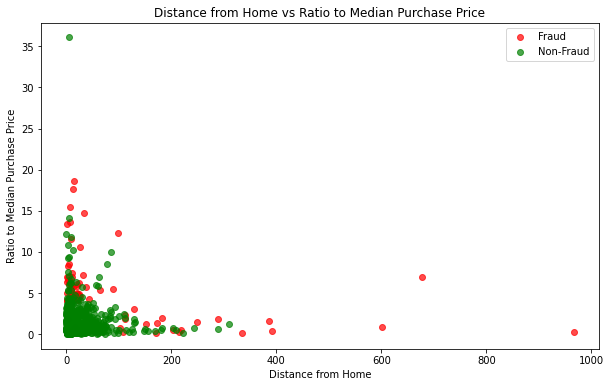

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[df_cleaned['fraud'] == 1]['distance_from_home'], 
           df_cleaned[df_cleaned['fraud'] == 1]['ratio_to_median_purchase_price'], 
           c='red', 
           alpha=0.7, 
           label='Fraud')
plt.scatter(df_cleaned[df_cleaned['fraud'] == 0]['distance_from_home'], 
           df_cleaned[df_cleaned['fraud'] == 0]['ratio_to_median_purchase_price'], 
           c='green', 
           alpha=0.7, 
           label='Non-Fraud')
plt.title('Distance from Home vs Ratio to Median Purchase Price')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')
plt.legend()
plt.show()

Now replace the column on the y-axis to be distance_from_last_transaction

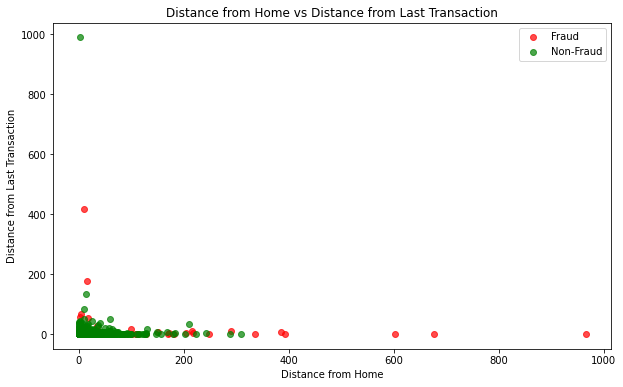

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[df_cleaned['fraud'] == 1]['distance_from_home'], 
           df_cleaned[df_cleaned['fraud'] == 1]['distance_from_last_transaction'], 
           c='red', 
           alpha=0.7, 
           label='Fraud')
plt.scatter(df_cleaned[df_cleaned['fraud'] == 0]['distance_from_home'], 
           df_cleaned[df_cleaned['fraud'] == 0]['distance_from_last_transaction'], 
           c='green', 
           alpha=0.7, 
           label='Non-Fraud')
plt.title('Distance from Home vs Distance from Last Transaction')
plt.xlabel('Distance from Home')
plt.ylabel('Distance from Last Transaction')
plt.legend()
plt.show()

I need you to split the dataset on the 'fraud' column into training and testing datasets with a test size of 0.2 and the random state of 42.

Rewrite the split to include stratify of y.

In [11]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_cleaned.drop('fraud', axis=1)
y = df_cleaned['fraud']

# Split the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train)
print(y_train)

     distance_from_home  distance_from_last_transaction  \
954           39.904167                        0.367448   
143            2.660649                        0.657162   
643           48.902727                        0.205816   
15           179.665148                        0.120920   
793          676.702348                        1.209733   
..                  ...                             ...   
685            5.916343                        5.099247   
722           23.517527                        3.513485   
173            3.273426                        1.056948   
499            7.387696                        1.598827   
593            5.630854                        1.626769   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
954                        0.260833              1.0        1.0   
143                        3.837860              1.0        0.0   
643                        1.307000              1.0        0.0   
15                     

#### Make a knn model to predict the test variables.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

Make the confusion matrix of this model on a heatmap.

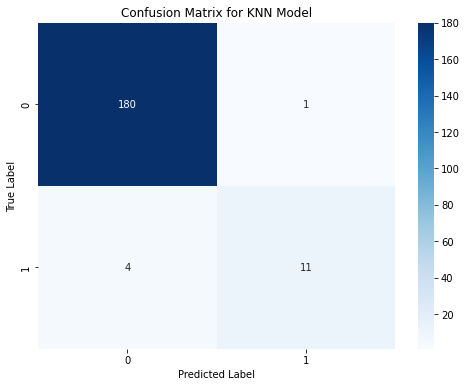

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Make a 3D chart of the KNN model.

Make the x axis of this distance_from_last_transaction and the z-axis distance_from_home and the y-axis ratio_to_median_purchase_price

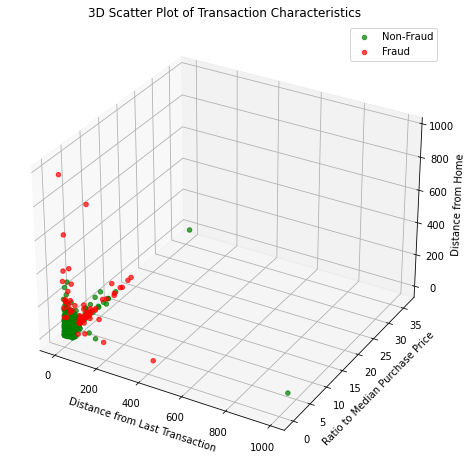

In [20]:
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot non-fraud points
scatter_non_fraud = ax.scatter(
   df_cleaned[df_cleaned['fraud'] == 0]['distance_from_last_transaction'],
   df_cleaned[df_cleaned['fraud'] == 0]['ratio_to_median_purchase_price'],
   df_cleaned[df_cleaned['fraud'] == 0]['distance_from_home'],
   c='green', 
   label='Non-Fraud', 
   alpha=0.7
)

# Plot fraud points
scatter_fraud = ax.scatter(
   df_cleaned[df_cleaned['fraud'] == 1]['distance_from_last_transaction'],
   df_cleaned[df_cleaned['fraud'] == 1]['ratio_to_median_purchase_price'],
   df_cleaned[df_cleaned['fraud'] == 1]['distance_from_home'],
   c='red', 
   label='Fraud', 
   alpha=0.7
)

ax.set_title('3D Scatter Plot of Transaction Characteristics')
ax.set_xlabel('Distance from Last Transaction')
ax.set_ylabel('Ratio to Median Purchase Price')
ax.set_zlabel('Distance from Home')
ax.legend()

plt.show()